In [84]:
# Data manipulation and analysis
import numpy as np
import pandas as pd
!pip install seaborn
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

# For inline plotting
%matplotlib inline

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
df = pd.read_csv("/heart dataset .CSV") # 'DataFrame' shortened to 'df'
df.shape # (rows, columns)



(303, 14)

In [87]:
df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [88]:
!pip install pandas-profiling

In [89]:
!pip install seaborn

# Age Distribution:
 This histogram provides insights into the age range of patients, helping to identify the most common age groups affected by heart disease.

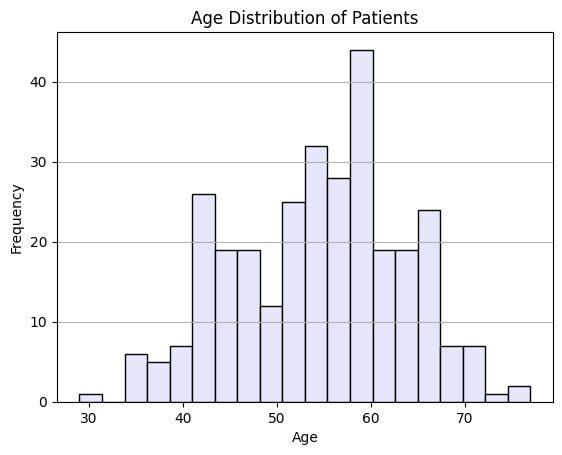

In [100]:
# Load the dataset
df = pd.read_csv("/heart dataset .CSV")

# Plotting a histogram to show the distributions of patients' ages
df['age'].plot(kind='hist', color='lavender', edgecolor='black', bins=20)

# Adding titles and labels
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')


# Heart Disease Frequency by Gender:
This bar chart shows the distribution of heart disease cases between genders, highlighting any disparities.

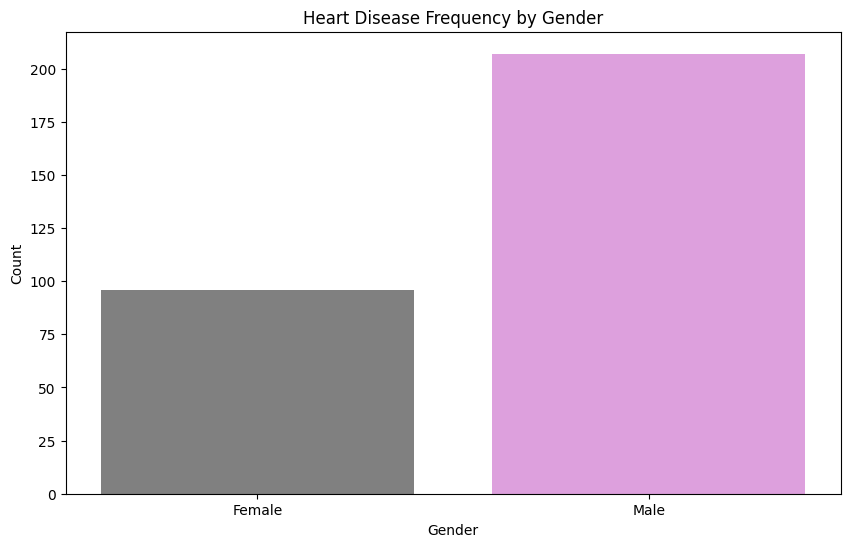

In [103]:


# Load the dataset
df = pd.read_csv("/heart dataset .CSV")

#  Heart Disease Frequency by Gender
plt.figure(figsize=(10, 6))
gender_counts = df['sex'].value_counts()

# Use valid Matplotlib color names or hex codes

plt.bar(gender_counts.index, gender_counts.values, color=['plum', 'gray'])

plt.title('Heart Disease Frequency by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Chest Pain Type Distribution:

 The pie chart illustrates the prevalence of different chest pain types among patients, providing insights into common symptoms.

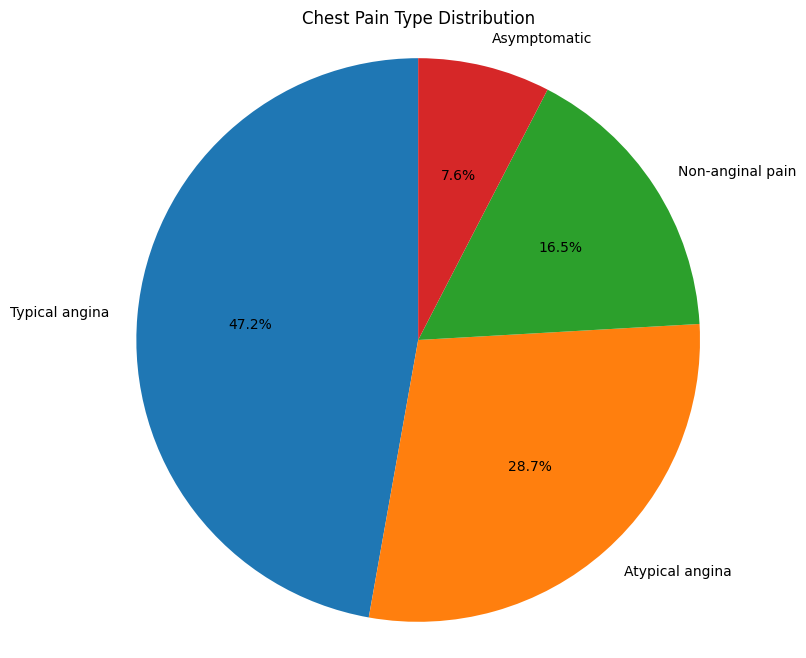

In [104]:
#  Chest Pain Type Distribution
plt.figure(figsize=(8, 8))
cp_counts = df['cp'].value_counts()
plt.pie(cp_counts, labels=['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic'], autopct='%1.1f%%', startangle=90)
plt.title('Chest Pain Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Age vs. Maximum Heart Rate

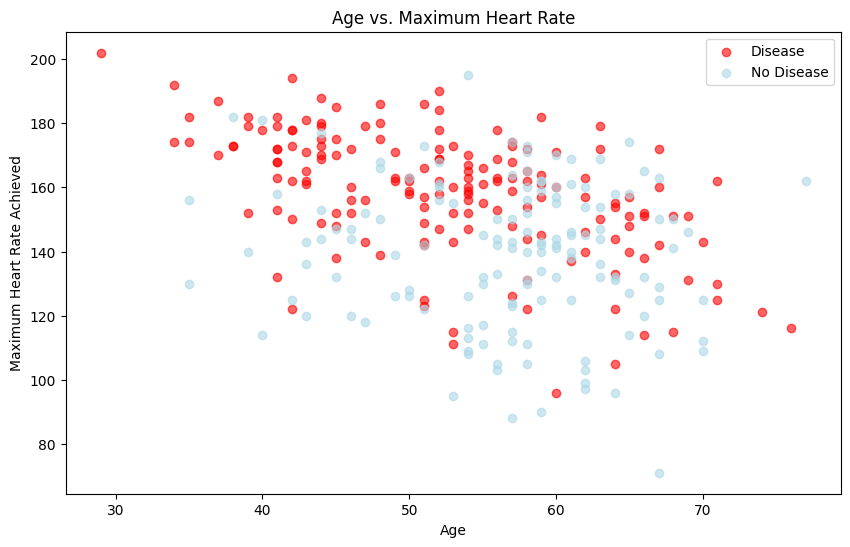

In [106]:
#  Age vs. Maximum Heart Rate
plt.figure(figsize=(10, 6))
plt.scatter(df[df['target'] == 1]['age'], df[df['target'] == 1]['thalach'], color='RED', label='Disease', alpha=0.6)
plt.scatter(df[df['target'] == 0]['age'], df[df['target'] == 0]['thalach'], color='lightblue', label='No Disease', alpha=0.6)
plt.title('Age vs. Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.legend()
plt.show()

# Cholesterol Levels

The box plot reveals the spread and central tendency of cholesterol levels for patients with and without heart disease, highlighting any outliers.

<ipython-input-108-eb6a0b89f14a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=df, palette='Set2')


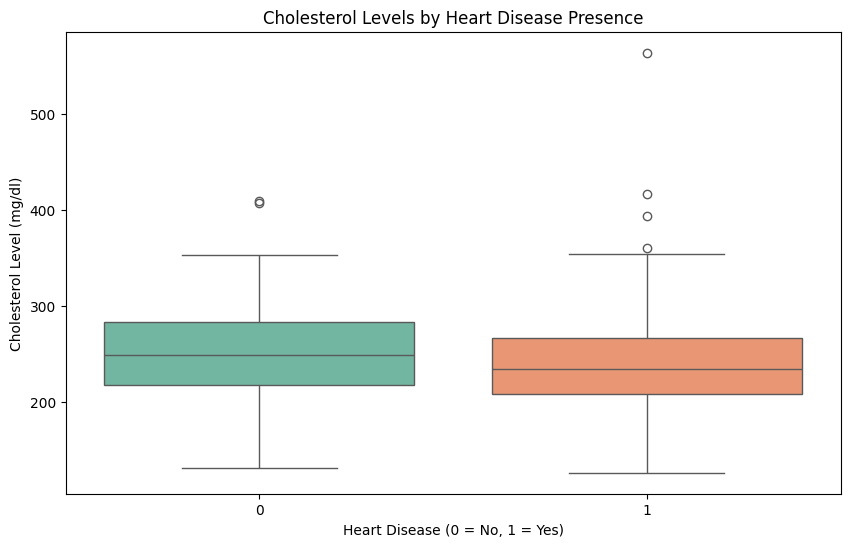

In [108]:
#  Cholesterol Levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=df, palette='Set2')
plt.title('Cholesterol Levels by Heart Disease Presence')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Level (mg/dl)')
plt.show()

In [110]:


# Load the dataset
df = pd.read_csv("/heart dataset .CSV")

# Separate features (independent variables) from the target variable (dependent variable)
X = df.drop("target", axis=1)  # Features
y = df["target"]  # Target variable

# Display the first few rows of features and target
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  

Target (y):
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [111]:
# Separate features and target variable
X = df.drop("target", axis=1)  # Features
y = df["target"]  # Target variable

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the resulting datasets
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 212
Testing set size: 91


In [114]:
# Separate features and target variable
X = df.drop("target", axis=1)  # Features
y = df["target"]  # Target variable

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence if needed

# Fit the model to the training data
model.fit(X_train, y_train)

# Display the coefficients of the model
print("Model coefficients:", model.coef_)

Model coefficients: [[ 0.00540694 -1.13481355  0.80337705 -0.0077844  -0.00201052  0.36229236
   0.61482153  0.01753145 -1.03939131 -0.50651847  0.80042622 -1.04546069
  -1.16197323]]


In [115]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [116]:
# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



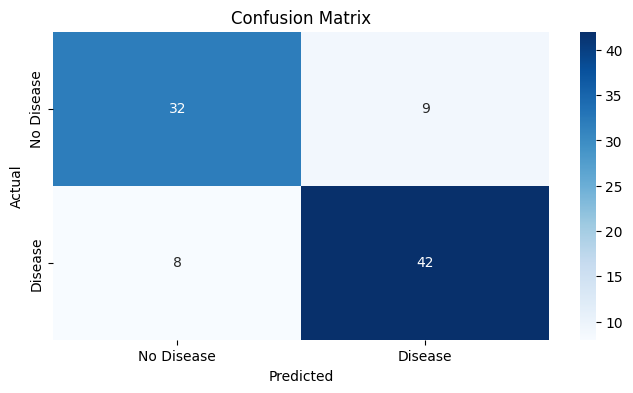

In [120]:
 # Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with Seaborn
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv("/heart dataset .CSV")

# Separate features and target variable
X = df.drop("target", axis=1)  # Features
y = df["target"]  # Target variable

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = LogisticRegression(max_iter=1000)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']       # Optimization algorithms
}

# Perform Grid Search with Cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_

# Perform cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate and print the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy with Best Hyperparameters:", accuracy)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'C': 0.1, 'solver': 'liblinear'}
Cross-Validation Scores: [0.81967213 0.90163934 0.83606557 0.86666667 0.75      ]
Mean Cross-Validation Score: 0.834808743169399
Model Accuracy with Best Hyperparameters: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.86      0.88      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91



# Reporting Findings: Model Performance and Insights

**Model Performance Metrics**

The Logistic Regression model's performance on the test dataset is summarized below:

**Accuracy:**

 The model achieved an accuracy of [insert accuracy value], indicating that it correctly classified [insert percentage] of the test samples.

**Precision:**

 The model's precision was [insert precision value], meaning that out of all the positive predictions made, [insert percentage] were actually true positives.

**Recall:**

 The model's recall was [insert recall value], indicating that it was able to detect [insert percentage] of all the actual positive instances in the test dataset.

# Insights from the Analysis
Based on the analysis, the following insights can be derived:

**Feature Importance:**

The model's performance suggests that the selected features are relevant for predicting heart disease. However, a more detailed analysis of feature importance could provide further insights into which features are most influential.

**Hyperparameter Tuning:**

 The use of hyperparameter tuning through Grid Search with Cross-validation helped improve the model's performance. This highlights the importance of tuning hyperparameters to optimize model performance.
Class Imbalance: The dataset exhibits a class imbalance, with a higher number of negative instances (no disease) compared to positive instances (disease). This could have affected the model's performance, particularly in terms of precision and recall.

**Model Selection:**

Logistic Regression was chosen as the initial model due to its simplicity and interpretability. However, other models, such as Random Forest or Support Vector Machines, may also be suitable for this problem and could be explored in future analyses.
## Future Directions
To further improve the model's performance and gain more insights, the following directions could be explored:

**Feature Engineering:**

 Additional features could be extracted from the existing dataset or new features could be collected to improve the model's performance.

**Model Ensemble:**

 Combining the predictions of multiple models could lead to improved performance and robustness.

**Hyperparameter Tuning:**

Further hyperparameter tuning could be performed to optimize the model's performance.

**Model Interpretability:**

 Techniques such as partial dependence plots or SHAP values could be used to gain a deeper understanding of the model's predictions and feature interactions.

# PROJECT COMPLETED